# Ayudantía 12

In [2]:

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

<div align="center">
  <h1>Cross Validation</h1>
</div>


<h2>¿Qué es la Validación Cruzada?</h2>
<p>
    La <strong>validación cruzada</strong> es una técnica de evaluación utilizada para estimar el rendimiento de un modelo de machine learning. Se utiliza principalmente para asegurar que el modelo generalice bien a datos no vistos y no se ajuste excesivamente (overfitting) a los datos de entrenamiento.
</p>

<h3>¿Para qué sirve la Validación Cruzada?</h3>
<ul>
    <li><strong>Evaluación del modelo:</strong> Permite obtener una estimación más confiable del rendimiento del modelo al evaluar su desempeño en múltiples subconjuntos de datos.</li>
    <li><strong>Detección de sobreajuste:</strong> Ayuda a identificar si un modelo está sobreajustado al conjunto de entrenamiento, lo que puede resultar en un mal rendimiento en datos nuevos.</li>
    <li><strong>Selección de hiperparámetros:</strong> Facilita la optimización de los hiperparámetros del modelo al probar diferentes configuraciones y seleccionar la que mejor rendimiento obtiene.</li>

</ul>

<h3>Validación Cruzada que veremos en esta ayudantia</h3>
<ul>
    <li><strong>k-fold Cross-Validation:</strong> Los datos se dividen en k subconjuntos (o pliegues). El modelo se entrena en k-1 subconjuntos y se evalúa en el subconjunto restante. Este proceso se repite k veces, y los resultados se promedian.</li>

</ul>




<div align="center">
  <h1>Recordatorio</h1>
</div>


### Regresión Lineal ###
$\hat{y_i} = \alpha x_i + \beta$

<img src="lineal.png" alt="Regresión Lineal" width="300" />




### Regresión Polinomial ###
 $ \hat{y_i} = \alpha_0 + \alpha_1 x_i + \alpha_2 x_i^2 + \cdots + \alpha_p x_i^p $
 
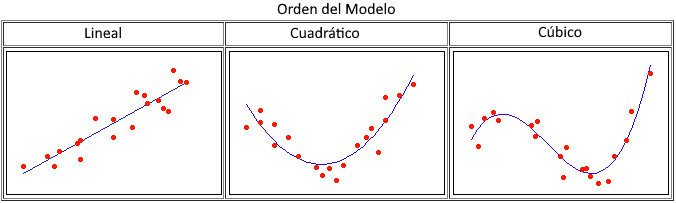



### Regresión Multilineal ###
$\hat{y_i} = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \cdots + \beta_k x_{ki}
$

<img src="linealmultiple.png" alt="Regresión Lineal" width="300" />




## Indicadores para evaluar la calidad de nuestros modelos 

### Coefficient of Determination.

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $




### Relación entre SST, SSR, SSE y \( R^2 \)

1. **Suma Total de Cuadrados (SST)**:
   - $$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$
     - **Variables**:
       - $ \ y_i \ $: Valores observados de la variable dependiente.
       - $ \bar{y} $: Media de los valores observados.

2. **Suma de Cuadrados de la Regresión (SSR)**:
   - $$ \text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 $$
     - **Variables**:
       - $ \hat{y}_i $: Valores predichos por el modelo.
       - $ \bar{y} $: Media de los valores observados.

3. **Suma de Cuadrados del Error (SSE)**:
   - $$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
     - **Variables**:
       - $ \ y_i \ $: Valores observados de la variable dependiente.
       - $ \hat{y}_i $: Valores predichos por el modelo.

### Relación entre SST, SSR y SSE:
- $$ \text{SST} = \text{SSR} + \text{SSE} $$

### Coeficiente de Determinación \( R^2 \):
- $$ R^2 = \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\text{SSE}}{\text{SST}} $$

### Resumen:
- El coeficiente de determinación \( R^2 \) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.




### Root Mean Squared Error

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$


<div align="center">
  <p>Trabajaremos con los  mismos datos  de la ayudantia 10, Boston Housing Data set que es un conjunto de datos que contiene información sobre el mercado de viviendas en Boston, las columnas de este dataset son las siguientes</p>
</div>


<div align="center">
  <p>Columnas</p>
</div>


- **crim**: Tasa de criminalidad per cápita por ciudad
- **zn**: Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
- **indus**: Proporción de acres de negocios no minoristas por ciudad
- **chas**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 de lo contrario)
- **nox**: Concentración de óxidos de nitrógeno (partes por 10 millones)
- **rm**: Número promedio de habitaciones por vivienda
- **age**: Proporción de unidades ocupadas por propietarios construidas antes de 1940
- **dis**: Distancias ponderadas a cinco centros de empleo de Boston
- **rad**: Índice de accesibilidad a autopistas radiales
- **tax**: Tasa de impuestos sobre la propiedad de valor total por cada $10,000
- **b**: 1000(Bk - 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad
- **lstat**: Porcentaje de población de estatus socioeconómico bajo
- **medv**: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares


Cargamos nuestro dataset

In [3]:
df = pd.read_csv('BostonHousing.csv')

Limpiamos nuestro dataset

In [4]:
df = df.dropna()

####  Filtremos nuestros Datos por nuestras columnas de interes medv (Valor mediano de las viviendas), rm (Numero Promedio habtiaciones por vivienda) y lstat (Porcentaje de poblacíon de estatus socioeconomico bajo)


In [5]:
df = df[['medv' ,'rm', 'lstat']]

In [6]:
df

,medv,rm,lstat
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33
...,...,...,...
501,22.4,6.593,9.67
502,20.6,6.120,9.08
503,23.9,6.976,5.64
504,22.0,6.794,6.48


#### Primer paso encontrar correlaciones

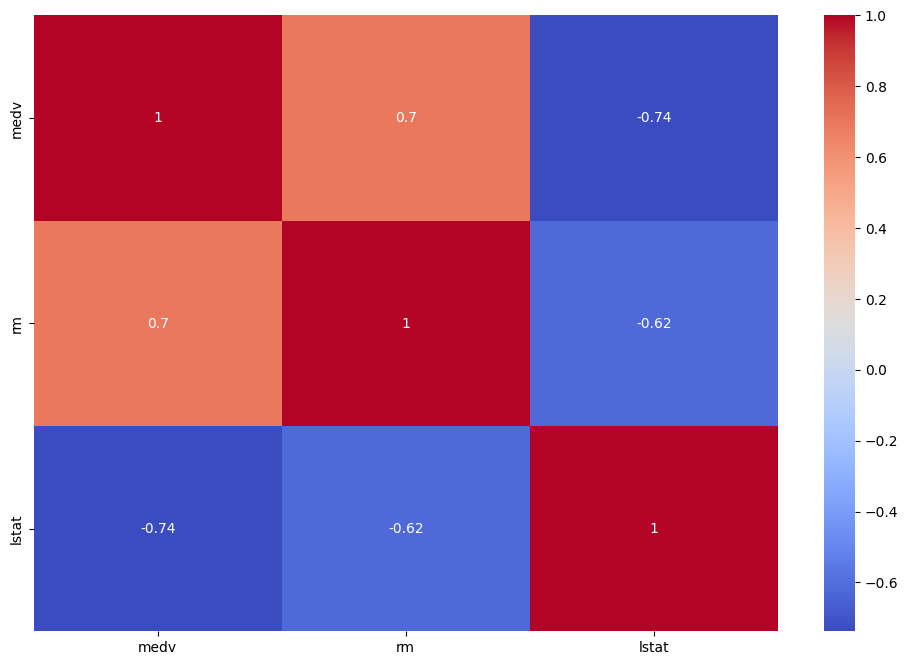

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Analizamos con pairplot como se ven las correlaciones


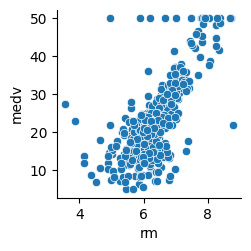

In [8]:
sns.pairplot(data=df, y_vars='medv', x_vars='rm')

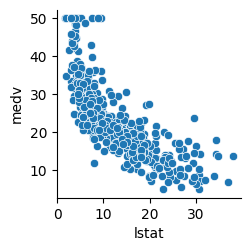

In [9]:
sns.pairplot(data=df, y_vars='medv', x_vars='lstat')

<h3>Caso de uso de Cross-Validation de esta ayudantia</h3>
<ul>
    <li><strong>Evaluación del modelo:</strong> Permite obtener una estimación más confiable del rendimiento del modelo al evaluar su desempeño en múltiples subconjuntos de datos.</li>

   <p> Compararemos el modelo de regresion tradicional, regression Lasso y de Ridge


</ul>

<div align="center">
  <h2>Validacíon Tradicional</h2>
</div>

<div style="width: 100%; display: flex; font-family: Arial, sans-serif; margin-top: 20px;">
  <!-- Sección de Entrenamiento -->
  <div style="width: 75%; background-color: #004080; color: white; text-align: center; padding: 10px 0; font-weight: bold;">
    Entrenamiento (75%)
  </div>
  
  <!-- Sección de Prueba -->
  <div style="width: 25%; background-color: #4CAF50; color: white; text-align: center; padding: 10px 0; font-weight: bold;">
    Prueba (25%)
  </div>
</div>


### Ejemplo

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [11]:

y_train = np.array(train.medv)
y_test = np.array(test.medv)
X_train = np.array(train.rm)
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = np.array(test.rm)
X_test = X_test.reshape(X_test.shape[0], 1)

<div>
  <h3>Donde cada iteración es llamado fold o pliegue </h3>
</div>

<div align="center">
  <h4>Regresíon Lineal</h4>
</div>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos nuestro modelo
linreg = LinearRegression()

## Le pasamos los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred_test = linreg.predict(X_test)
R2_lineal_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)


Conjunto de prueba
R^2 (test) 0.5139029661697858
RMSE (test) 36.82808053589672


<div align="center">
  <h4>Regresíon Ridge</h4>
</div>

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)


In [15]:

ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)

In [16]:
R2_ridge_test_ = r2_score(y_test, y_pred_ridge)
rmse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_ridge_test_)
print('RMSE (test)', rmse_test_ridge)


Conjunto de prueba
R^2 (test) 0.5139403777218376
RMSE (test) 36.825246131331276


<div align="center">
  <h4>Regresíon Lasso</h4>
</div>

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

In [18]:
lasso.fit(X_train, y_train)


y_pred_lasso = lasso.predict(X_test)

In [19]:
R2_lasso_test_ = r2_score(y_test, y_pred_lasso)
rmse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_ridge_test_)
print('RMSE (test)', rmse_test_ridge)


Conjunto de prueba
R^2 (test) 0.5139403777218376
RMSE (test) 36.825246131331276


<div align="center">
  <h2>Representacion gráfica de lo que realiza al hacer cross validation</h2>
</div>

<table style="width: 100%; border-collapse: collapse; font-family: Arial, sans-serif;">
  <thead>
    <tr>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Iteración</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Set 1</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Set 2</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Set 3</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Set 4</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">Set 5</th>
      <th style="border: 1px solid #ddd; padding: 8px; background-color: #black;">MSE, R2 o cualquier otra</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">1</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #4CAF50; color: white;"><strong>Test</strong></td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td>0.89</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">2</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #4CAF50; color: white;"><strong>Test</strong></td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td>0.81</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">3</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #4CAF50; color: white;"><strong>Test</strong></td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td>0.84</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">4</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #4CAF50; color: white;"><strong>Test</strong></td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td>0.80</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">5</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #004080; color: white;">Train</td>
      <td style="border: 1px solid #ddd; padding: 8px; background-color: #4CAF50; color: white;"><strong>Test</strong></td>
       <td>0.89</td>
    </tr>
  </tbody>
</table>


### variable objetivo (lo que quieres predecir)


In [20]:
y = df['medv']

In [21]:
X = df[['rm']]

In [26]:
cantidad_folds = 5

mse_score_linereg = cross_val_score(linreg, X, y, cv=cantidad_folds, scoring='neg_mean_squared_error')

neg_mean_squared_error =-(mse_score_linereg)
print(neg_mean_squared_error)

mean_accuracy_lr = sum(neg_mean_squared_error)/cantidad_folds

print(mean_accuracy_lr)


[  9.77486433  38.24952084  33.15483531 108.71772533  73.20921073]
52.621231308494956


In [27]:
mse_score_ridge = cross_val_score(ridge, X, y, cv=cantidad_folds, scoring='neg_mean_squared_error')

neg_mean_squared_error =-(mse_score_ridge)
print(neg_mean_squared_error)

mean_accuracy_lr = sum(neg_mean_squared_error)/cantidad_folds

print(mean_accuracy_lr)

[  9.79842177  38.44828281  33.51533269 108.28352945  73.14105945]
52.63732523255478


In [28]:
mse_score_lasso = cross_val_score(lasso, X, y, cv=cantidad_folds, scoring='neg_mean_squared_error')

neg_mean_squared_error =-(mse_score_lasso)
print(neg_mean_squared_error)

mean_accuracy_lr = sum(neg_mean_squared_error)/cantidad_folds

print(mean_accuracy_lr)

[11.57399916 50.28350851 57.08717823 95.21981553 71.44550713]
57.12200171159155


### ¿Qué modelo tiene mejores métricas?